In [2]:
# dataset source:   https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  LOAD LIBRARY & DATASET
</div>


In [1]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
data = pd.read_csv("../datasets/cars.csv")

In [3]:
data.shape

(762091, 20)

In [4]:
# from IPython.display import display

def columns_info(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns],
        'null values': [data[col].isna().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,12187,0
2,year,100,0
3,mileage,158751,506
4,engine,6903,15050
5,transmission,1313,9904
6,drivetrain,33,21562
7,fuel_type,36,22927
8,mpg,865,142071
9,exterior_color,7681,8859


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [6]:
data.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Cleaning & Visualization
    
</div>

In [8]:
data.duplicated().sum()
data.drop_duplicates().head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


#### drop row if it has more than 13 null values

In [9]:
rows_to_drop = (data.isnull().sum(axis=1) > 13).sum()
print(f"Rows with >13 nulls: {rows_to_drop}")

Rows with >13 nulls: 0


In [10]:
bool_cols = ['accidents_or_damage', 'one_owner', 'personal_use_only']

data[bool_cols] = data[bool_cols].fillna(-1)  ## here we fill with -1 to maintain datatype float. otherwise it will be object type.

In [11]:
# Fill missing values with 'Unknown' in specified columns
data[['exterior_color', 'interior_color', 'seller_name']] = data[['exterior_color', 'interior_color', 'seller_name']].fillna('Unknown')

In [12]:
### drop row if all mentioned column has null.
data.dropna(subset=['engine', 'fuel_type','transmission'], how='all', inplace=True)

### check for null
both_null = data[data['engine'].isnull() & data['fuel_type'].isnull()& data['transmission'].isnull() ]
print("Number of rows where both 'engine', transmission and 'fuel_type' are null:", len(both_null))

Number of rows where both 'engine', transmission and 'fuel_type' are null: 0


In [13]:
## drop rows if both has null
data.dropna(subset=['engine', 'fuel_type'], how='all', inplace=True)
both_null = data[data['engine'].isnull() & data['fuel_type'].isnull()]
len(both_null)

0

### 'Enigne'. clean & process 

In [14]:
data['engine'] = data['engine'].str.lower().str.strip()

In [15]:
import re

def extract_engine_attributes(text):
    if pd.isna(text) or str(text).strip() == "":
        return {
            "engine_size": "NaN",
            "cylinders": "NaN",
            "valves": "NaN",
            "aspiration": "NaN",
            "fuel_type_2": "NaN",
            "injection_system": "NaN",
            "configuration": "NaN",
            "horsepower": "NaN"
        }

    text = str(text).lower()

    return {
        "engine_size": re.search(r"\d+(\.\d+)?l", text),
        "cylinders": re.search(r"(v\d|i\d|w\d|inline\s?\d|straight\s?\d)", text),
        "valves": re.search(r"\d+v", text),
        "aspiration": re.search(r"(twin turbo|turbocharger|turbo|supercharged|supercharger|natural aspiration)", text),
        "fuel_type_2": re.search(r"(gasoline|gasoline/mild|gasoline/natural|gasoline fuel|gas|unleaded|regular unleaded|premium|premium \(required\)|petrol|premium unleaded|diesel|turbo-diesel|turbodiesel|diesel fuel|b20-diesel|ecodiesel|tdi|cdi|dci|twin turbo diesel|dis|electric|electric fuel system|electrically|electricmotors|bev|zev|electric motor|plug-in hybrid|plug-in electric/gas|phev|plug-in|plug-in ev|hybrid|full-hybrid|electric/gas|hybrid fuel|gasoline/mild electric hybrid|gas/electric hybrid|gas/electric|gas/ethanol|mild hybrid|mhev|hev|gasoline/electric|flex fuel|flexfuel|flex-fuel|flexible|flexible fuel|flex fuel capability|e85 flex fuel|e85 fl|e85 fuel|e85 ethanol|ffv|compressed natural gas|natural gas|gaseous|cng|lng|biodiesel|bio diesel|e100|hydrogen fuel cell|hydrogen|h2|bi-fuel|b-fuel|duel fuel|ethanol)", text),
        "injection_system": re.search(r"(mpfi|spfi|pgm-fi|gdi|ddi|pdi|di|fsi|sidi|efi|sefi|tfsi|smpi|mfi)", text),
        "configuration": re.search(r"(sohc|dohc|ohv|vvt|vtc|vanos|valvetronic|timing)", text),
        "horsepower": re.search(r"\d+(\.\d+)?hp", text)
    }

### Apply extraction → expand into new DataFrame
attr_df = data["engine"].apply(lambda x: pd.Series(extract_engine_attributes(x)))

### Convert regex match objects → actual strings
for col in attr_df.columns:
    attr_df[col] = attr_df[col].apply(lambda x: x.group(0) if x and hasattr(x, "group") else ("NaN" if x != "NaN" else "NaN"))

## Merge new columns into original DataFrame
data = pd.concat([data, attr_df], axis=1)



In [16]:
data.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,price_drop,price,engine_size,cylinders,valves,aspiration,fuel_type_2,injection_system,configuration,horsepower
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5l i-4 i-vtec variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,...,300.0,13988.0,1.5l,NaN,NaN,NaN,NaN,NaN,NaN,90hp
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,...,NaN,17995.0,1.5l,i4,8v,NaN,hybrid,mpfi,sohc,NaN
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,...,500.0,17000.0,1.5l,i4,8v,NaN,hybrid,mpfi,sohc,NaN
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,...,675.0,14958.0,1.5l,i4,8v,NaN,hybrid,mpfi,sohc,NaN
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Unknown,...,300.0,14498.0,1.5l,i4,8v,NaN,hybrid,mpfi,sohc,NaN


In [17]:
data = data.replace('NaN', np.nan)

## Fuel_type column 

In [18]:
data['fuel_type'] =  data['fuel_type'].str.lower().str.strip()

In [19]:
data[data['fuel_type']== 'cng']

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,price_drop,price,engine_size,cylinders,valves,aspiration,fuel_type_2,injection_system,configuration,horsepower


In [20]:
def map_fuel(fuel):
    if pd.isnull(fuel):
        return np.nan

    fuel = fuel.lower()

    if any(keyword in fuel for keyword in [
        'gasoline', 'gasoline/mild', 'gasoline/natural', 'gasoline fuel',
        'gas', 'unleaded', 'regular unleaded', 'premium', 'premium (required)', 'petrol','premium unleaded'
    ]):
        return 'gasoline'

    elif any(keyword in fuel for keyword in [
        'diesel', 'turbo-diesel', 'turbodiesel', 'diesel fuel', 'b20-diesel', 'ecodiesel','tdi','cdi','dci','twin turbo diesel','dis'
    ]):
        return 'diesel'

    elif any(keyword in fuel for keyword in [
        'electric', 'electric fuel system', 'electrically', 'electricmotors','bev','zev','electric motor'
    ]):
        return 'electric'

    elif any(keyword in fuel for keyword in [
        'plug-in hybrid', 'plug-in electric/gas', 'phev','plug-in','phev','plug-in ev'
    ]):
        return 'plug-in hybrid'

    elif any(keyword in fuel for keyword in [
        'hybrid', 'full-hybrid', 'electric/gas', 'hybrid fuel',
        'gasoline/mild electric hybrid', 'gas/electric hybrid', 'gas/electric', 'gas/ethanol','mild hybrid','mhev','hev','gasoline/electric'
    ]):
        return 'hybrid'

    elif any(keyword in fuel for keyword in [
        'flex fuel', 'flexfuel', 'flex-fuel', 'flexible', 'flexible fuel',
        'flex fuel capability', 'e85 flex fuel', 'e85 fl','e85 fuel','e85 ethanol','ffv'
    ]):
        return 'flex fuel'

    elif any(keyword in fuel for keyword in [
        'compressed natural gas', 'natural gas', 'gaseous','cng','lng'
    ]):
        return 'cng'

    elif any(keyword in fuel for keyword in [
        'biodiesel', 'bio diesel','e100'
    ]):
        return 'biodiesel'

    elif any(keyword in fuel for keyword in [
        'hydrogen fuel cell', 'hydrogen','h2'
    ]):
        return 'hydrogen'

    elif any(keyword in fuel for keyword in [
        'bi-fuel', 'b-fuel','duel fuel'
    ]):
        return 'bi-fuel'

    elif 'ethanol' in fuel:
        return 'ethanol','e100'

    else:
        return np.nan

    
data['fuel_category'] = data['engine'].apply(map_fuel)
data['fuel_category'].value_counts()

fuel_category
gasoline          42317
diesel            28079
hybrid            27330
flex fuel         18312
electric          16091
cng                  25
bi-fuel               9
plug-in hybrid        3
hydrogen              1
Name: count, dtype: int64

In [21]:
data['fuel_type'] = data['fuel_type'].apply(map_fuel)
data['fuel_type'].value_counts()

fuel_type
gasoline          644939
hybrid             29146
diesel             27974
flex fuel          19269
electric           16194
plug-in hybrid       120
hydrogen               3
bi-fuel                1
Name: count, dtype: int64

In [22]:
data['fuel_type_2'] = data['fuel_type_2'].apply(map_fuel)
data['fuel_type_2'].value_counts()

fuel_type_2
gasoline          42301
diesel            28079
hybrid            27331
flex fuel         18322
electric          16096
cng                  25
bi-fuel               9
plug-in hybrid        3
hydrogen              1
Name: count, dtype: int64

In [23]:
data['fuel_category'].nunique()

9

In [24]:
data['fuel_category'].value_counts() 

fuel_category
gasoline          42317
diesel            28079
hybrid            27330
flex fuel         18312
electric          16091
cng                  25
bi-fuel               9
plug-in hybrid        3
hydrogen              1
Name: count, dtype: int64

In [25]:
data['fuel_type'].nunique()

8

In [26]:
data['fuel_type'] = data['fuel_type'].fillna(data['fuel_category'])
data['fuel_type'] = data['fuel_type'].fillna(data['fuel_type_2'])

In [27]:
data['fuel_type'].isnull().sum()

np.int64(12158)

In [28]:
## fill all null fuel type with gasoline where engine is not elextric
mask = (data['fuel_type'].isna()) & (data['engine'] != 'electric')
data.loc[mask, 'fuel_type'] = 'gasoline'


In [29]:
## fill null with electric where engine is electric..
maske = (data['fuel_type'].isna()) & (data['engine'] == 'electric')
data.loc[mask, 'fuel_type'] = 'electric'

In [30]:
data['fuel_type'].value_counts()


fuel_type
gasoline          645156
hybrid             29329
electric           28513
diesel             28191
flex fuel          19328
plug-in hybrid       120
hydrogen               3
bi-fuel                1
Name: count, dtype: int64

In [31]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11916,0
2,year,99,0
3,mileage,158699,494
4,engine,6808,3600
5,transmission,1298,5449
6,drivetrain,28,11929
7,fuel_type,8,0
8,mpg,865,130837
9,exterior_color,7589,0


## engine_size column

In [32]:
def extract_engine_size(val):
    try:
        return float(str(val).lower().replace('l', '').strip())
    except:
        return np.nan

data['engine_size'] = data['engine_size'].apply(extract_engine_size)

bins = np.arange(0, 10, 1)  # 0-1L, 1-2L, ..., 8-9L
labels = [f'{i}-{i+1}L' for i in bins[:-1]]
data['engine_size'] = pd.cut(data['engine_size'], bins=bins, labels=labels, right=False)

# View result
data['engine_size'].value_counts()

engine_size
2-3L    273722
3-4L    220730
1-2L     88499
5-6L     49284
6-7L     45485
4-5L     29541
7-8L       705
8-9L       238
0-1L        91
Name: count, dtype: int64

## cylinders column

In [33]:
data['cylinders'].nunique()

20

In [34]:
# 1. Mapping dictionary with lowercase keys and lowercase values
engine_cylinders_mapping = {
    'i3': 'i3',
    'i4': 'i4',
    'i5': 'i5',
    'i6': 'i6',
    'i8': 'i8',

    'inline 2': 'i2',
    'inline 4': 'i4',
    'inline 5': 'i5',
    'inline 6': 'i6',
    'straight 6': 'i6',
    'straight 8': 'i8',

    'v3': 'v3',
    'v4': 'v4',
    'v6': 'v6',
    'v8': 'v8',
    'v1': 'other',
    'v0': 'other',

    'w1': 'other',
    'w5': 'w5',
    'w8': 'w8',

    np.nan: np.nan,
    None: np.nan
}

# 2. Convert column to lowercase, then map
data['cylinders'] = data['cylinders'].str.lower().map(engine_cylinders_mapping)

# 3. View result
data['cylinders'].value_counts()


cylinders
i4       296663
v6       199791
v8        96863
i6        23858
i3         7446
i5         1853
other       700
i2           18
v4            5
i8            4
v3            3
w8            2
w5            1
Name: count, dtype: int64

In [35]:
data['cylinders'].nunique()

13

## valves column

In [36]:
data['valves'] = data['valves'].str.lower().replace('697v', np.nan)

In [37]:

data['valves'].value_counts()

valves
16v    358208
24v    213357
32v     43375
12v     12430
20v      2076
8v        552
18v       227
40v       220
36v       128
48v        84
30v        63
4v         10
3v          5
10v         2
2v          1
Name: count, dtype: int64

## aspiration column

In [38]:
data['aspiration'].nunique()

6

In [39]:
data['aspiration'].value_counts()

aspiration
turbo                 196385
twin turbo             37292
supercharged            7497
supercharger             386
turbocharger              75
natural aspiration        66
Name: count, dtype: int64

## injection column

In [40]:
data['injection_system'].value_counts()

injection_system
gdi       326403
mpfi      225014
pdi        52185
di         31992
ddi        23885
smpi         329
spfi         273
sidi         242
efi          195
tfsi          66
mfi           65
pgm-fi        31
fsi           31
sefi          30
Name: count, dtype: int64

## configuration column

In [41]:
data['configuration'].value_counts()

configuration
dohc      568421
ohv        66183
sohc       39286
vvt         1285
timing       196
vanos          1
Name: count, dtype: int64

## engine column

In [42]:
data['engine'].isnull().sum()

np.int64(3600)

In [43]:

ENGINE_COLUMNS = [
    'cylinders',
    'valves',
    'aspiration',
    'fuel_type',
    'injection_system',
    'configuration'
]

data[ENGINE_COLUMNS] = data[ENGINE_COLUMNS].fillna('')

def create_engine_details(row):
    if pd.isna(row['engine']):
        return np.nan
    # concatenate non-empty strings with single space
    return ' '.join(filter(None, [str(row[col]) for col in ENGINE_COLUMNS])).strip()

data['ENGINE_DETAILS'] = data.apply(create_engine_details, axis=1)


data[ENGINE_COLUMNS] = data[ENGINE_COLUMNS].replace('', np.nan)


In [44]:
### drop row if all mentioned column has null.
data.dropna(subset=['engine', 'ENGINE_DETAILS'], how='all', inplace=True)

### check for null
both_null = data[data['engine'].isnull() & data['ENGINE_DETAILS'].isnull()]
print("Number of rows where both 'engine', transmission and 'fuel_type' are null:", len(both_null))

Number of rows where both 'engine', transmission and 'fuel_type' are null: 0


In [45]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11818,0
2,year,98,0
3,mileage,158672,494
4,engine,6808,0
5,transmission,1292,2750
6,drivetrain,27,8765
7,fuel_type,8,0
8,mpg,865,127438
9,exterior_color,7549,0


## Transmission column

In [101]:
data['transmission']= data['transmission'].str.lower().str.strip()

In [102]:
def map_transmission(trans):

    if pd.isnull(trans):
        return 'Unknown'
    
    trans = trans.lower()
    if 'manual' in trans or 'm/t' in trans or '5-spd w/overdrive' in trans or '5-speed manual' in trans or '6 speed manual' in trans or 'manual 5-speed' in trans or 'stick' in trans or '4+3 manual' in trans or 'tremec' in trans or 'muncie' in trans or 'on the tree' in trans :
        return 'Manual'
    
    elif 'automatic' in trans or 'auto' in trans or 'a/t' in trans or 'a' in trans or '6-spd seq sptshft' in trans or '7-spd S trnc Spt' in trans or '8-speed' in trans or 'geartronic' in trans or 'steptronic' in trans or 'shiftronic' in trans or 'tiptronic' in trans or 'powershift' in trans or 'selectshift' in trans or 'torqshift' in trans or 'hydramatic' in trans or 'speedshift' in trans: 
        return 'Automatic'
    
    elif ('cvt' in trans or 'continuously variable' in trans or 
          'ecvt' in trans or 'ivt' in trans or 
          'xtronic' in trans or 'multitronic' in trans or 
          'lineartronic' in trans or 'variabl' in trans):
        return 'CVT'
    
    elif 'semi' in trans or 'sequential' in trans or 'w/dual' in trans or 'smg' in trans or 'autostick' in trans:
        return 'Semi-Automatic'
    

    elif 'dual' in trans or 'dct' in trans or 'dual clutch' in trans or 'dual-clutch' in trans or 'double clutch' in trans or 's tronic' in trans or 'pdk' in trans or 'dsg' in trans:
        return 'Dual-Clutch'
    
    elif 'tiptronic' in trans or 'shiftable' in trans or  'geartronic' in trans:
        return 'Automatic'
    
    elif ('select' in trans or 'not specified' in trans or 
          'unspecified' in trans or 'unknown' in trans or 
          'other' in trans or trans.strip() in ['a', 'nan']):
        return 'Unknown'

    else:
        return 'Unknown'
data['transmission'] = data['transmission'].apply(map_transmission)
data['transmission'].value_counts()

transmission
Automatic    716492
Manual        23716
Unknown        4575
CVT            2258
Name: count, dtype: int64

In [103]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11818,0
2,year,98,0
3,mileage,158674,0
4,engine,6808,0
5,transmission,4,0
6,drivetrain,6,0
7,fuel_type,8,0
8,mpg,75,1
9,exterior_color,7549,0


In [49]:
engine_null = data[pd.isna(data['engine'])]
engine_null
# data['engine'].isnull().sum()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,engine_size,cylinders,valves,aspiration,fuel_type_2,injection_system,configuration,horsepower,fuel_category,ENGINE_DETAILS


###  'Mileage' column

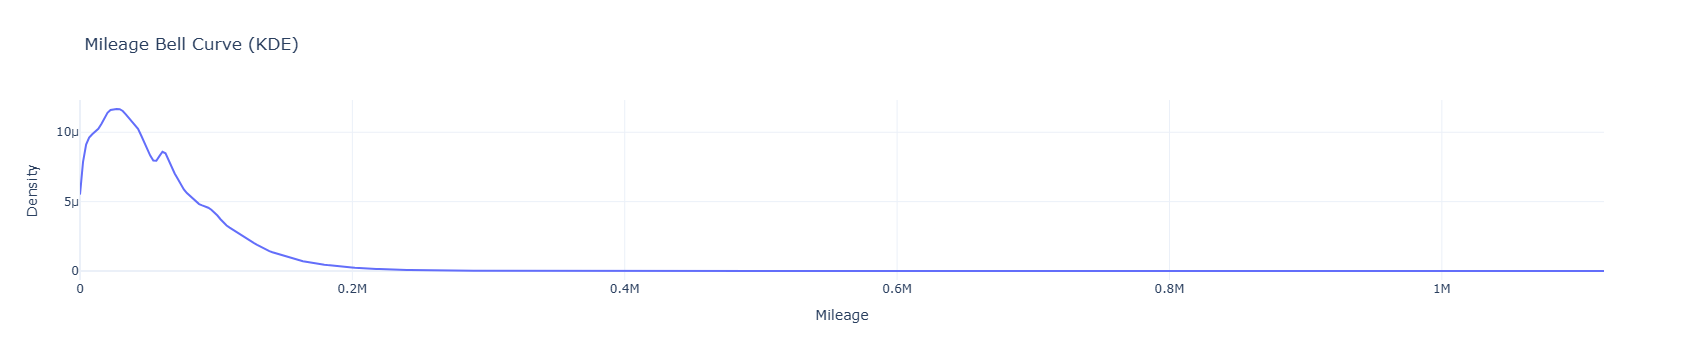

In [50]:
mileage = data['mileage'].dropna()

kde = gaussian_kde(mileage)
x = np.linspace(mileage.min(), mileage.max(), 500)
y = kde(x)

fig = px.line(x=x, y=y, labels={'x': 'Mileage', 'y': 'Density'}, title='Mileage Bell Curve (KDE)')
fig.update_layout(template='plotly_white')

fig.show()

In [51]:
data['mileage'].isnull().sum()

np.int64(494)

In [52]:
data['age'] = 2023 - data['year']

data['age_group'] = pd.cut(
    data['age'],
    bins=[0, 20, 40, 80, 108],
    labels=['0-20', '21-40', '41-80', '81+']
)

df_20 = data[data['age_group'] == '0-20']
df_40 = data[data['age_group'] == '21-40']
df_80 = data[data['age_group'] == '41-80']
df_80_plus = data[data['age_group'] == '81+']

In [53]:
df_20['mileage'].describe()

count    7.205360e+05
mean     5.720791e+04
std      4.274810e+04
min      0.000000e+00
25%      2.513800e+04
50%      4.737700e+04
75%      7.971500e+04
max      1.119067e+06
Name: mileage, dtype: float64

In [54]:
df_40['mileage'].describe()

count      6560.000000
mean     108493.888262
std       71424.333383
min           0.000000
25%       55545.250000
50%       97956.000000
75%      153028.250000
max      999999.000000
Name: mileage, dtype: float64

In [55]:
df_80['mileage'].describe()

count      1765.000000
mean      39732.109915
std       45063.490053
min           0.000000
25%        3400.000000
50%       31787.000000
75%       67752.000000
max      999999.000000
Name: mileage, dtype: float64

In [56]:
df_80_plus['mileage'].describe()

count      125.000000
mean     19424.088000
std      27020.034248
min          0.000000
25%        142.000000
50%       5724.000000
75%      28844.000000
max      99944.000000
Name: mileage, dtype: float64

In [57]:
data.loc[(data['age'] >= 0) & (data['age'] <= 20) & (data['mileage'].isna()), 'mileage'] = 46625.0
data.loc[(data['age'] > 20) & (data['age'] <= 40) & (data['mileage'].isna()), 'mileage'] = 97518.5
data.loc[(data['age'] > 40) & (data['age'] <= 80) & (data['mileage'].isna()), 'mileage'] = 27995.5
data.loc[(data['age'] > 80) & (data['mileage'].isna()), 'mileage'] = 5559.5

data.fillna({'mileage': data['mileage'].median()}, inplace=True)


missing_count = data['mileage'].isna().sum()
print(f"✅ Mileage nulls remaining: {missing_count}")


✅ Mileage nulls remaining: 0


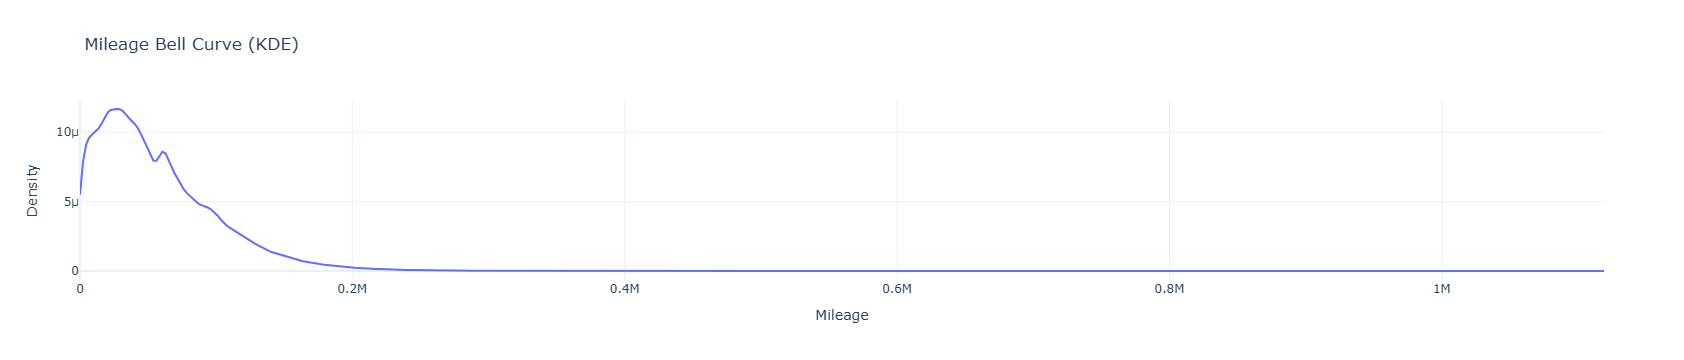

In [58]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(data['mileage'])
x = np.linspace(data['mileage'].min(), data['mileage'].max(), 500)
y = kde(x)

fig = px.line(x=x, y=y, labels={'x': 'Mileage', 'y': 'Density'}, title='Mileage Bell Curve (KDE)')
fig.update_layout(template='plotly_white')

fig.show()

In [59]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11818,0
2,year,98,0
3,mileage,158674,0
4,engine,6808,0
5,transmission,6,0
6,drivetrain,27,8765
7,fuel_type,8,0
8,mpg,865,127438
9,exterior_color,7549,0


In [60]:
data['age_group'] = data['age_group'].fillna('0-20')


## drivetrain column

In [61]:
# Define a mapping dictionary
engine_mapping = {
    # Front-wheel Drive variations
    'Front-wheel Drive': 'FWD',
    'Front-Wheel Drive': 'FWD',
    'Front Wheel Drive': 'FWD',
    'Front-Wheel Drive with Limited-Slip Differential': 'FWD',

    # Rear-wheel Drive variations
    'Rear-wheel Drive': 'RWD',
    'Rear-Wheel Drive': 'RWD',
    'Rear Wheel Drive': 'RWD',
    'Rear-Wheel Drive with Limited-Slip Differential': 'RWD',

    # All-wheel Drive variations
    'All-wheel Drive': 'AWD',
    'All-Wheel Drive': 'AWD',
    'All Wheel Drive': 'AWD',
    'All-Wheel Drive with Locking and Limited-Slip Differential': 'AWD',
    'All-Wheel Drive with Locking Differential': 'AWD',

    # Four-wheel Drive (4WD / 4x4) variations
    'Four-wheel Drive': '4WD',
    'Four-Wheel Drive': '4WD',
    'Four Wheel Drive': '4WD',
    'Four-Wheel Drive with Locking and Limited-Slip Differential': '4WD',
    'Four-Wheel Drive with Locking Differential': '4WD',
    '4WD': '4WD',
    '4x4': '4WD',
    '4X4': '4WD',
    '4x2': '2WD',
    '2WD': '2WD',

    # Already short forms — map to themselves (optional but safe)
    'FWD': 'FWD',
    'RWD': 'RWD',
    'AWD': 'AWD',

    # Optional cleanup
    'Unknown': 'Unknown',
    float('nan'): 'Unknown' 
}
data['drivetrain'] = data['drivetrain'].map(engine_mapping)

In [62]:
data['seller_rating'].describe()

count    538529.000000
mean          4.156340
std           0.805793
min           1.000000
25%           3.800000
50%           4.500000
75%           4.700000
max           5.000000
Name: seller_rating, dtype: float64

In [62]:
# data = data.drop(columns=['exterior_color','interior_color'],axis =1)

### MPG [mileage per gallon] column

In [63]:
def clean_mpg(val):
    try:
        if pd.isna(val):
            return np.nan
            
        parts = val.split('-')
        low = float(parts[0])
        high = float(parts[1])
        
        if low == 0 and high == 0:
            return np.nan
            
        return (low + high) //2
        
    except:
        return np.nan

data['mpg'] = data['mpg'].apply(clean_mpg)
data['mpg'].unique()

array([ 38.,  nan,  21.,  20.,  10.,  22.,  19.,  29.,  30.,  26.,  35.,
        17.,  12.,  27.,  28.,  32.,  31.,  33.,  25.,  24.,  23.,   9.,
         8.,  34.,  11.,  18.,  15.,  16.,   6.,  36.,  37.,  77.,  13.,
        94.,  86.,   7.,  14.,  76.,  72.,  69.,  56.,   5.,  42.,  71.,
        41.,  39., 127.,  40.,  43.,  66.,  81.,  60.,   4.,  47.,  48.,
        52.,  45.,  44.,  50.,  58.,  54.,  55.,  59.,  73., 121.,  49.,
        46.,  53., 102., 118.])

In [64]:
data['fuel_type'].unique()

array(['gasoline', 'hybrid', 'electric', 'diesel', 'flex fuel',
       'plug-in hybrid', 'bi-fuel', 'hydrogen'], dtype=object)

In [65]:
gasoline = data[data['fuel_type'] == 'gasoline']
hybrid = data[data['fuel_type'] == 'hybrid']

electric = data[data['fuel_type'] == 'electric']

diesel = data[data['fuel_type'] == 'diesel']

flex_fuel = data[data['fuel_type'] == 'flex fuel']

hydrogen = data[data['fuel_type'] == 'hydrogen']
plug_in_hybrid = data[data['fuel_type'] == 'plug in hybrid']
bi_fuel = data[data['fuel_type'] == 'bi-fuel']


In [66]:
## Replace all different sub category with mean #############

for fuel in data['fuel_type'].unique():
    mean_val = data.loc[data['fuel_type'] == fuel, 'mpg'].mean()
    data.loc[(data['fuel_type'] == fuel) & (data['mpg'].isna()), 'mpg'] = mean_val

In [67]:
data[pd.isna(data['mpg'])]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,valves,aspiration,fuel_type_2,injection_system,configuration,horsepower,fuel_category,ENGINE_DETAILS,age,age_group
134462,Chevrolet,S-10 Blazer LT,1992,149637.0,4.3l v6 12v mpfi ohv bi-fuel,Automatic,4WD,bi-fuel,NaN,White,...,12v,NaN,bi-fuel,mpfi,ohv,NaN,bi-fuel,v6 12v bi-fuel mpfi ohv,31,21-40


In [68]:
######### replace gasoline with mean and it 'mpg' as exceptional value replaced by actual values.
replace_map = {
    127.0: 12.7,
    121.0: 12.1,
    118.0: 11.8,
    102.0: 10.2,
}

# Create a mask for cars that are NOT electric or hybrid
mask = ~data['fuel_type'].isin(['electric', 'hybrid'])

# Loop through each mpg value and replace only for non-electric/hybrid cars
for wrong_mpg, correct_mpg in replace_map.items():
    data.loc[mask & (data['mpg'] == wrong_mpg), 'mpg'] = correct_mpg

In [69]:
gasoline['mpg'].describe()

count    569612.000000
mean         24.201769
std           5.060935
min           4.000000
25%          21.000000
50%          24.000000
75%          28.000000
max         127.000000
Name: mpg, dtype: float64

In [70]:
gasoline['mpg'].isnull().sum()

np.int64(72558)

In [71]:
hybrid['mpg'].describe()

count    18794.000000
mean        41.038523
std          7.724938
min         16.000000
25%         37.000000
50%         40.000000
75%         48.000000
max         86.000000
Name: mpg, dtype: float64

In [72]:
electric['mpg'].isnull().sum()

np.int64(26142)

In [73]:

data.loc[(data['engine'] == 'electric') & (data['mpg'].isna()), 'mpg'] = 100
# data.loc[(data['fuel_type'] == 'bi fuel') & (data['mpg'].isna()), 'mpg'] = 50


In [74]:
electric.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,valves,aspiration,fuel_type_2,injection_system,configuration,horsepower,fuel_category,ENGINE_DETAILS,age,age_group
209,Acura,ILX Premium Package,2020,18378.0,2.4l,Unknown,FWD,electric,17.0,Platinum White Pearl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric,3,0-20
6761,Acura,TLX FWD,2017,86979.0,2.4l,Unknown,FWD,electric,NaN,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric,6,0-20
7190,Acura,TLX A-Spec,2019,16581.0,3.5l,Unknown,AWD,electric,24.0,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric,4,0-20
7594,Acura,TLX A-Spec,2019,16581.0,3.5l,Unknown,AWD,electric,24.0,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric,4,0-20
8146,Acura,MDX 3.5L,2016,75536.0,3.5l,Automatic,FWD,electric,NaN,Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric,7,0-20


In [75]:
electric['mpg'].describe()

count    2250.000000
mean       20.741778
std         2.193504
min        14.000000
25%        21.000000
50%        21.000000
75%        21.000000
max        29.000000
Name: mpg, dtype: float64

In [76]:
diesel['mpg'].describe()

count    4507.000000
mean       24.899268
std         7.298047
min         6.000000
25%        19.000000
50%        23.000000
75%        30.000000
max       127.000000
Name: mpg, dtype: float64

In [77]:
flex_fuel['mpg'].describe()

count    14572.000000
mean        21.987510
std          4.645661
min          5.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         33.000000
Name: mpg, dtype: float64

In [78]:
hydrogen['mpg'].describe()

count     2.000000
mean     69.500000
std       4.949747
min      66.000000
25%      67.750000
50%      69.500000
75%      71.250000
max      73.000000
Name: mpg, dtype: float64

In [79]:
plug_in_hybrid['mpg'].isnull().sum()


np.int64(0)

In [80]:
bi_fuel['mpg'].isnull().sum()

np.int64(1)

In [81]:
data['mpg'].isnull().sum()

np.int64(1)

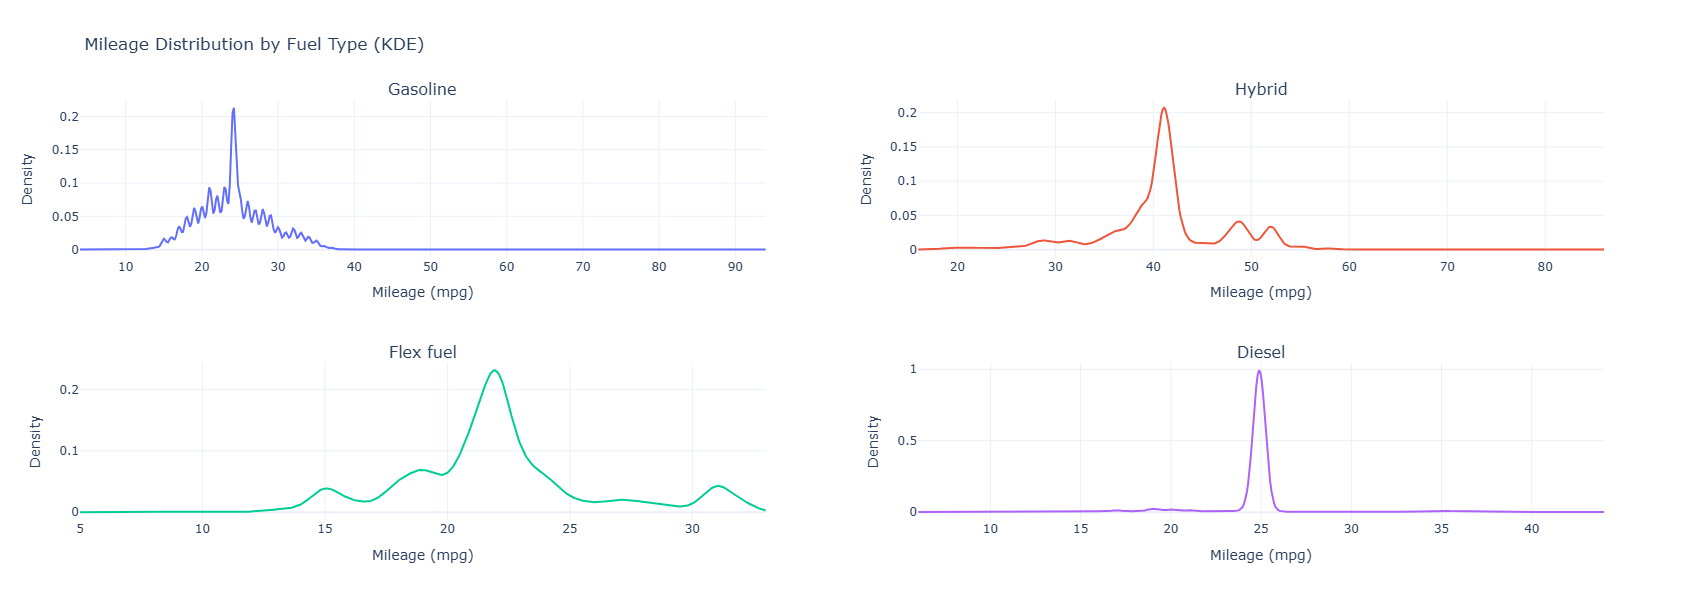

In [82]:
from plotly.subplots import make_subplots


fuel_types = ['gasoline', 'hybrid', 'flex fuel','diesel']


fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[ft.capitalize() for ft in fuel_types],
    shared_xaxes=False,
    shared_yaxes=False
)

row_col_map = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, fuel in enumerate(fuel_types):
    row, col = row_col_map[i]

    subset = data[data['fuel_type'] == fuel]

   
    mpg_values = pd.to_numeric(subset['mpg'], errors='coerce').dropna()

    if len(mpg_values) > 1:
        kde = gaussian_kde(mpg_values)
        x = np.linspace(mpg_values.min(), mpg_values.max(), 500)
        y = kde(x)

        
        fig.add_trace(
            go.Scatter(x=x, y=y, mode='lines', name=fuel.capitalize()),
            row=row, col=col
        )


fig.update_layout(
    height=600,
    width=1000,
    title_text='Mileage Distribution by Fuel Type (KDE)',
    template='plotly_white',
    showlegend=False
)

fig.update_xaxes(title_text="Mileage (mpg)")
fig.update_yaxes(title_text="Density")

fig.show()


C:\Users\Kartik\AppData\Local\Temp\ipykernel_10596\1637220966.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



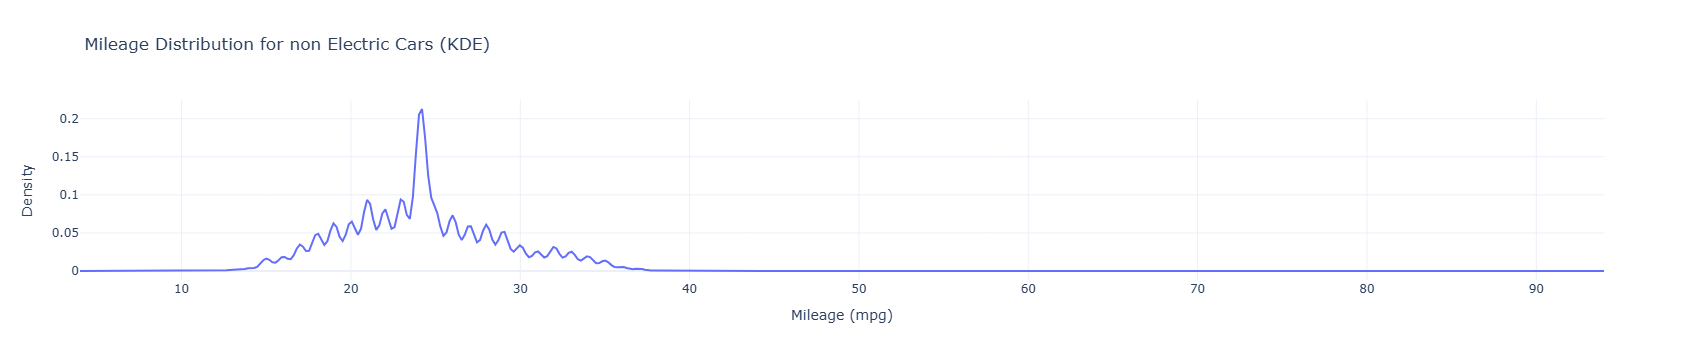

In [83]:
mileage_fuel = data[data['fuel_type'] == 'gasoline']

mileage_fuel['mpg'] = pd.to_numeric(mileage_fuel['mpg'], errors='coerce')

mpg_values = mileage_fuel['mpg'].dropna()




if len(mpg_values) > 1:
 
    kde = gaussian_kde(mpg_values)


    x = np.linspace(mpg_values.min(), mpg_values.max(), 500)
    y = kde(x)


    fig = px.line(x=x, y=y, labels={'x': 'Mileage (mpg)', 'y': 'Density'},
                  title='Mileage Distribution for non Electric Cars (KDE)')
    fig.update_layout(template='plotly_white')
    fig.show()

else:
    print("Not enough data points to plot KDE for  cars.")


In [84]:
data['manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'RAM',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [85]:
data.loc[data['manufacturer'] == 'Tesla', 'fuel_category'] = data.loc[data['manufacturer'] == 'Tesla', 'fuel_category'].fillna('electric')

data.loc[data['manufacturer'] == 'Tesla', 'engine'] = data.loc[data['manufacturer'] == 'Tesla', 'engine'].fillna('electric')


In [86]:

data['age_group'] = data['age_group'].fillna('0-20')

In [87]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11818,0
2,year,98,0
3,mileage,158674,0
4,engine,6808,0
5,transmission,6,0
6,drivetrain,6,0
7,fuel_type,8,0
8,mpg,75,1
9,exterior_color,7549,0


In [88]:
data['seller_rating'].describe()

count    538529.000000
mean          4.156340
std           0.805793
min           1.000000
25%           3.800000
50%           4.500000
75%           4.700000
max           5.000000
Name: seller_rating, dtype: float64

In [89]:
# data['seller_rating'].fillna(data['seller_rating'].mean(), inplace=True)
data['seller_rating'] = data['seller_rating'].fillna(data['seller_rating'].mean())



In [90]:
data['seller_rating'].describe()

count    747041.000000
mean          4.156340
std           0.684157
min           1.000000
25%           4.100000
50%           4.156340
75%           4.600000
max           5.000000
Name: seller_rating, dtype: float64

In [91]:
data['driver_rating'].describe()

count    716600.000000
mean          4.623261
std           0.275780
min           1.000000
25%           4.500000
50%           4.700000
75%           4.800000
max           5.000000
Name: driver_rating, dtype: float64

In [92]:
data['driver_rating'] = data['driver_rating'].fillna(data['driver_rating'].mean())

In [93]:
data['driver_rating'].describe()

count    747041.000000
mean          4.623261
std           0.270103
min           1.000000
25%           4.500000
50%           4.700000
75%           4.800000
max           5.000000
Name: driver_rating, dtype: float64

In [100]:
cols_to_exclude = [
    'engine_size', 'cylinders', 'valves', 'aspiration',
    'fuel_type_2', 'injection_system', 'configuration',
    'horsepower', 'fuel_category'
]

new_data = data.drop(columns=cols_to_exclude)

In [95]:
columns_info(new_data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11818,0
2,year,98,0
3,mileage,158674,0
4,engine,6808,0
5,drivetrain,6,0
6,fuel_type,8,0
7,mpg,75,1
8,exterior_color,7549,0
9,interior_color,4371,0


In [96]:
new_data.head()

,manufacturer,model,year,mileage,engine,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,ENGINE_DETAILS,age,age_group
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5l i-4 i-vtec variable valve control, engine...",FWD,gasoline,38.0,Black,Parchment,...,0.0,Iconic Coach,4.15634,4.4,12.0,300.0,13988.0,gasoline,10,0-20
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5l i4 8v mpfi sohc hybrid,FWD,hybrid,38.0,Gray,Ebony,...,1.0,Kars Today,4.15634,4.4,12.0,NaN,17995.0,i4 8v hybrid mpfi sohc,10,0-20
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5l i4 8v mpfi sohc hybrid,FWD,hybrid,38.0,Bellanova White Pearl,Ebony,...,1.0,Weiss Toyota of South County,4.30000,4.4,12.0,500.0,17000.0,i4 8v hybrid mpfi sohc,10,0-20
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5l i4 8v mpfi sohc hybrid,FWD,hybrid,38.0,Polished Metal Metallic,Unknown,...,1.0,Apple Tree Acura,4.15634,4.4,12.0,675.0,14958.0,i4 8v hybrid mpfi sohc,10,0-20
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5l i4 8v mpfi sohc hybrid,FWD,hybrid,38.0,Unknown,Ebony,...,1.0,Herb Connolly Chevrolet,3.70000,4.4,12.0,300.0,14498.0,i4 8v hybrid mpfi sohc,10,0-20


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Analysis
</div>

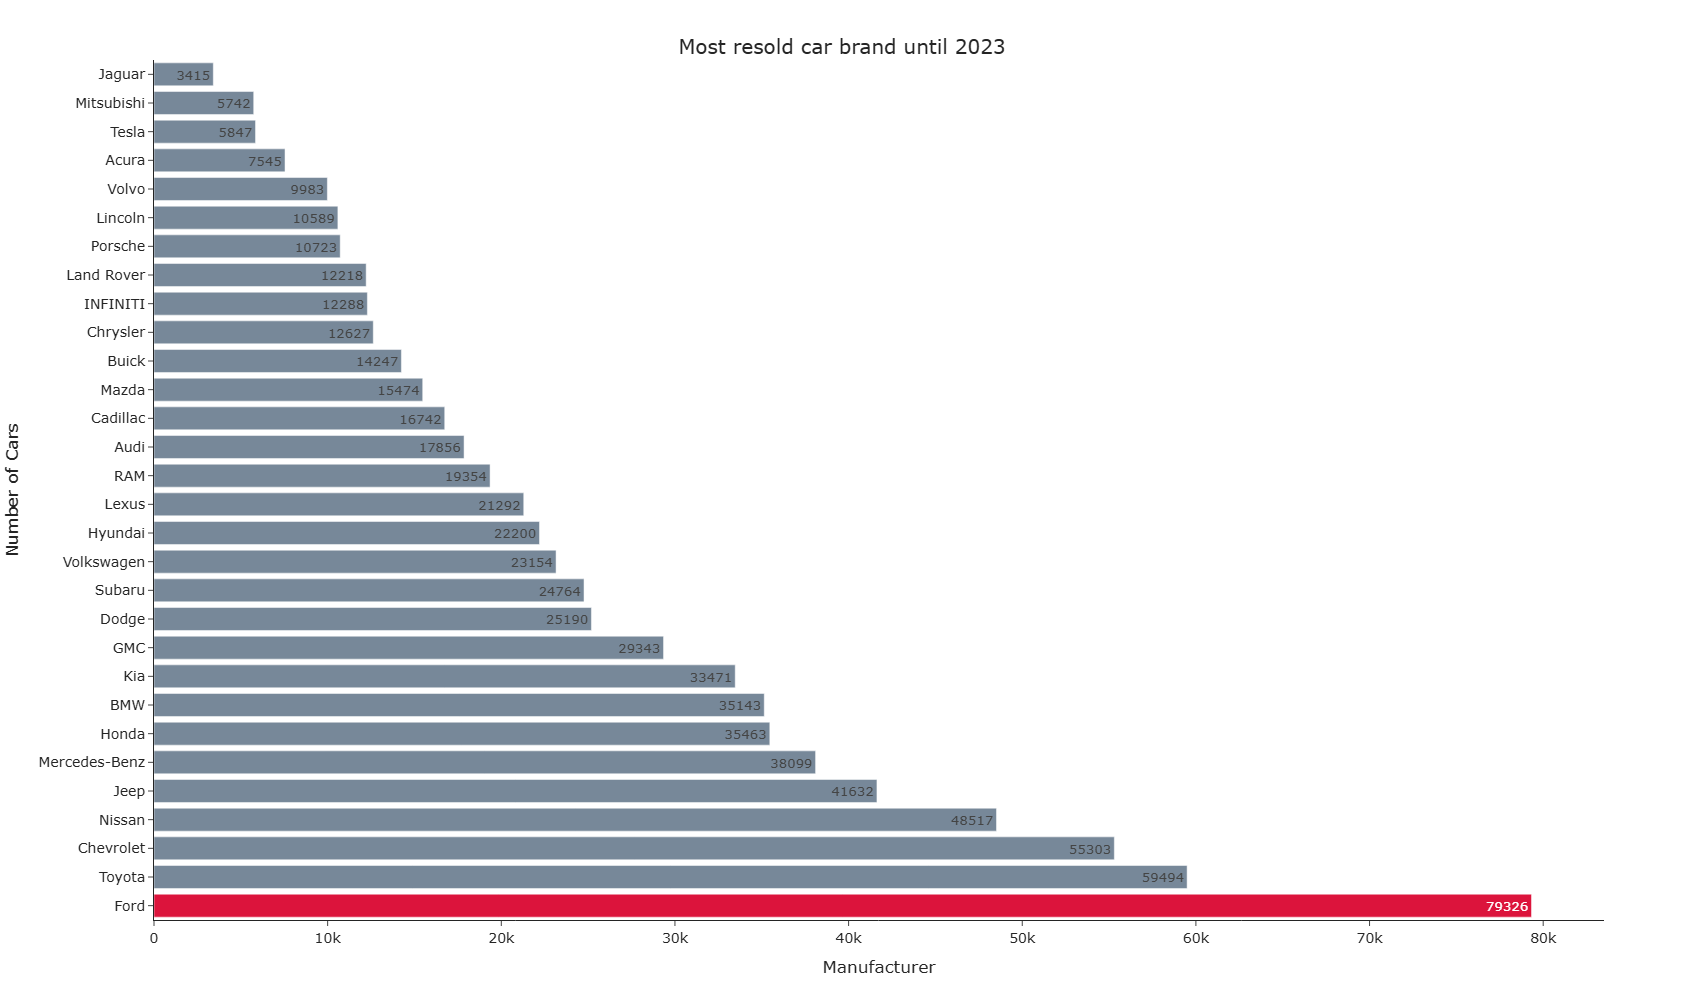

In [97]:
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(y = data['manufacturer'].value_counts().index, x = data['manufacturer'].value_counts(),
             # color = data['manufacturer'].value_counts().index,
             # orintation='h',
              template = 'simple_white',text = data['manufacturer'].value_counts(),)

fig.update_traces(marker_color=color) 

fig.update_layout(
    xaxis_title="Manufacturer",
    yaxis_title="Number of Cars",
    showlegend = False,
    height=1000,
    width=1400
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Most resold car brand until 2023",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

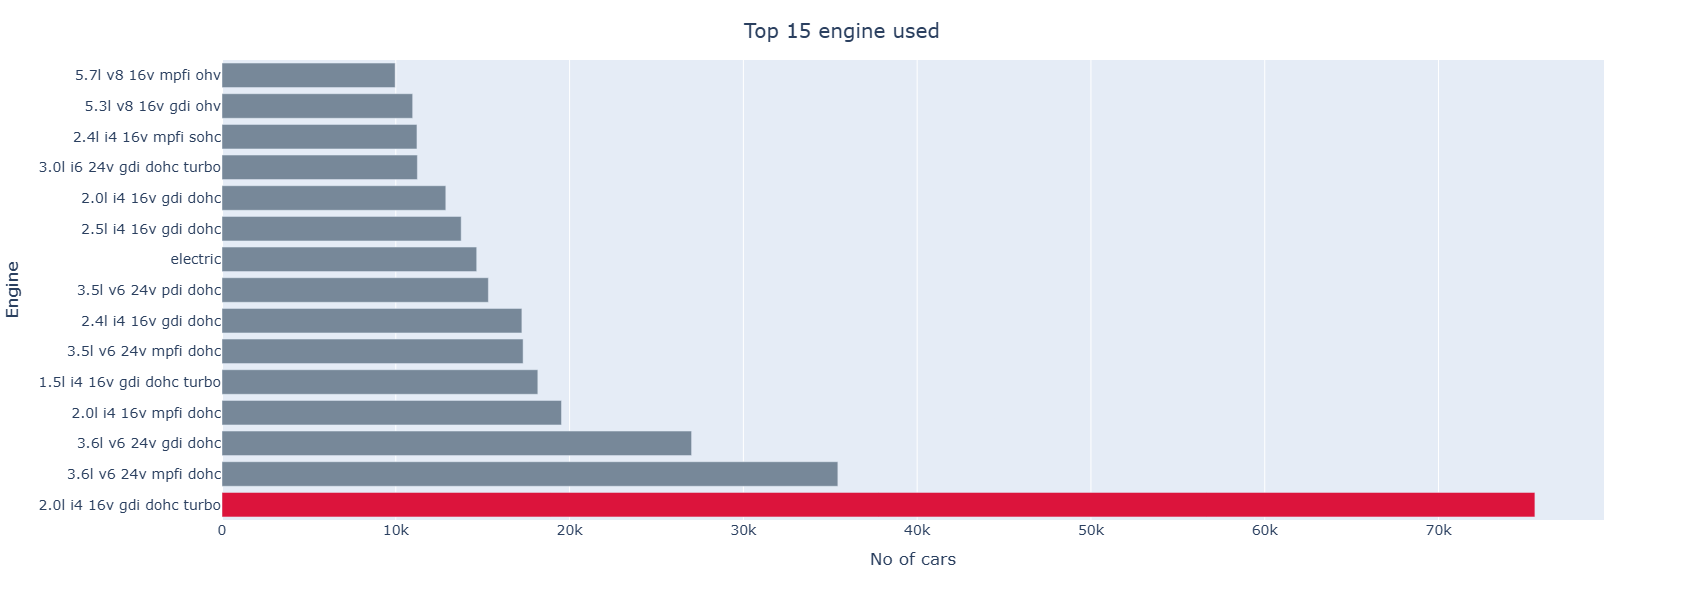

In [98]:
most_used_engin = data['engine'].value_counts().head(15)

color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h',
)
fig.update_traces(marker_color=color) 

fig.update_layout(
    yaxis_title="Engine",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200,
    font = dict(size = 14),    
    title={
        'text': "Top 15 engine used",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

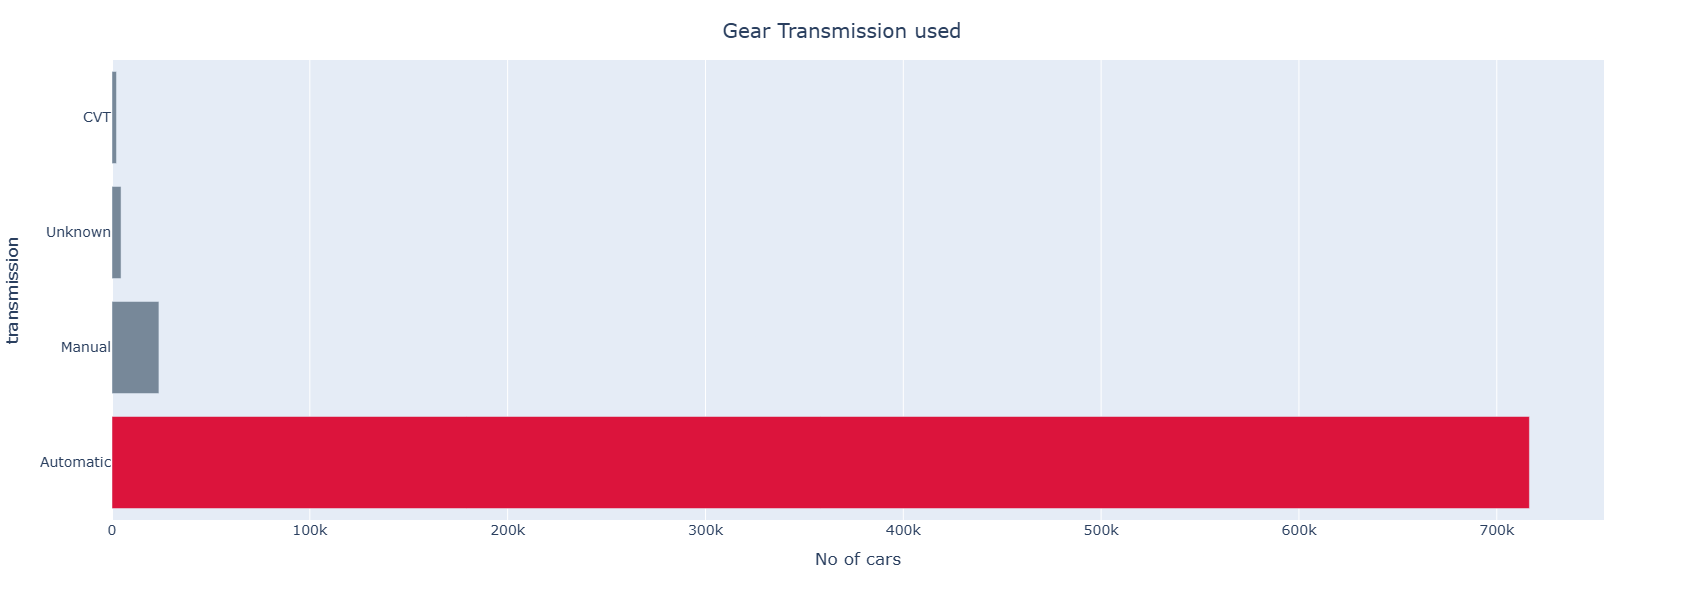

In [104]:
most_used_engin = data['transmission'].value_counts()
color = ['lightslategray']*6
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="transmission",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Gear Transmission used",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

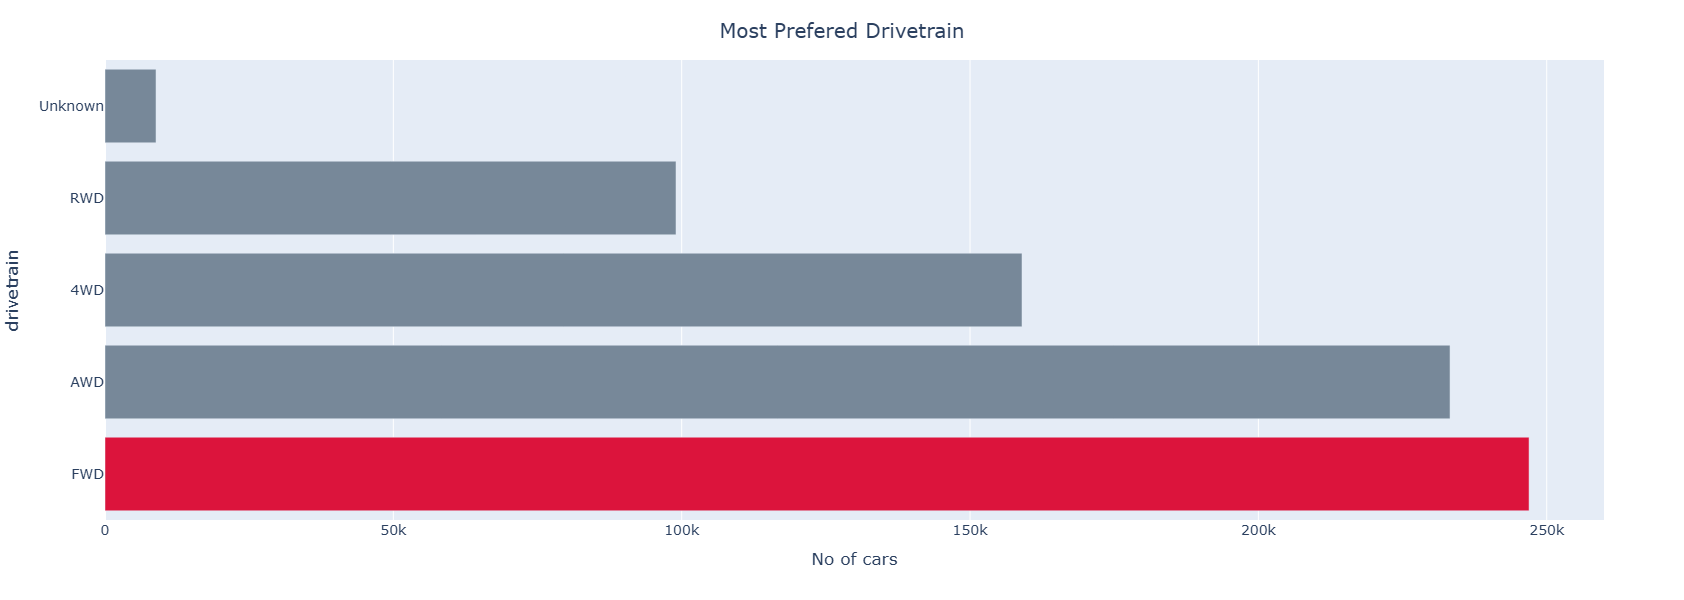

In [105]:
most_used_engin = data['drivetrain'].value_counts().head(5)
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="drivetrain",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200,
    font = dict(size = 14),    
    title={
        'text': "Most Prefered Drivetrain",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

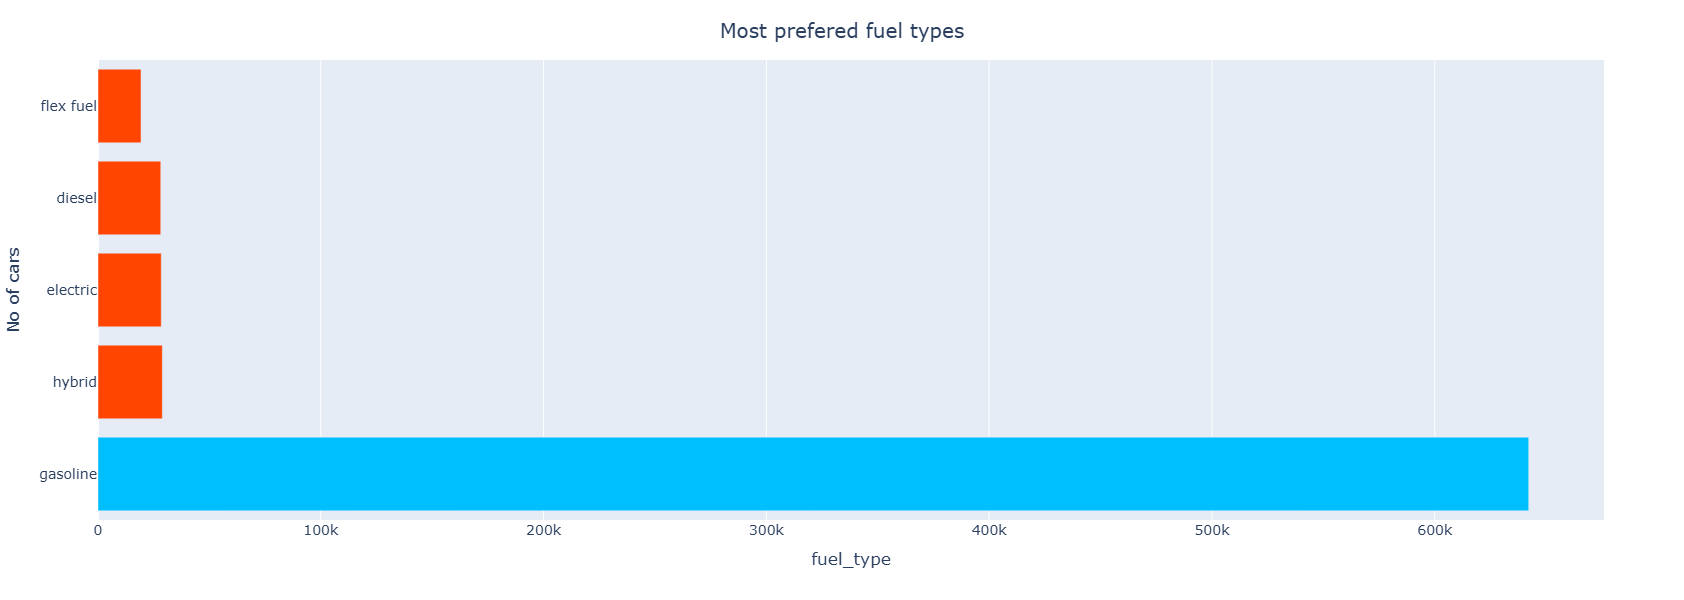

In [106]:
most_used_engin = data['fuel_type'].value_counts().head(5)

color = ['#FF4500']*30
color[0] = '#00BFFF' 

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)
fig.update_layout(
    xaxis_title="fuel_type",
    yaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Most prefered fuel types",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

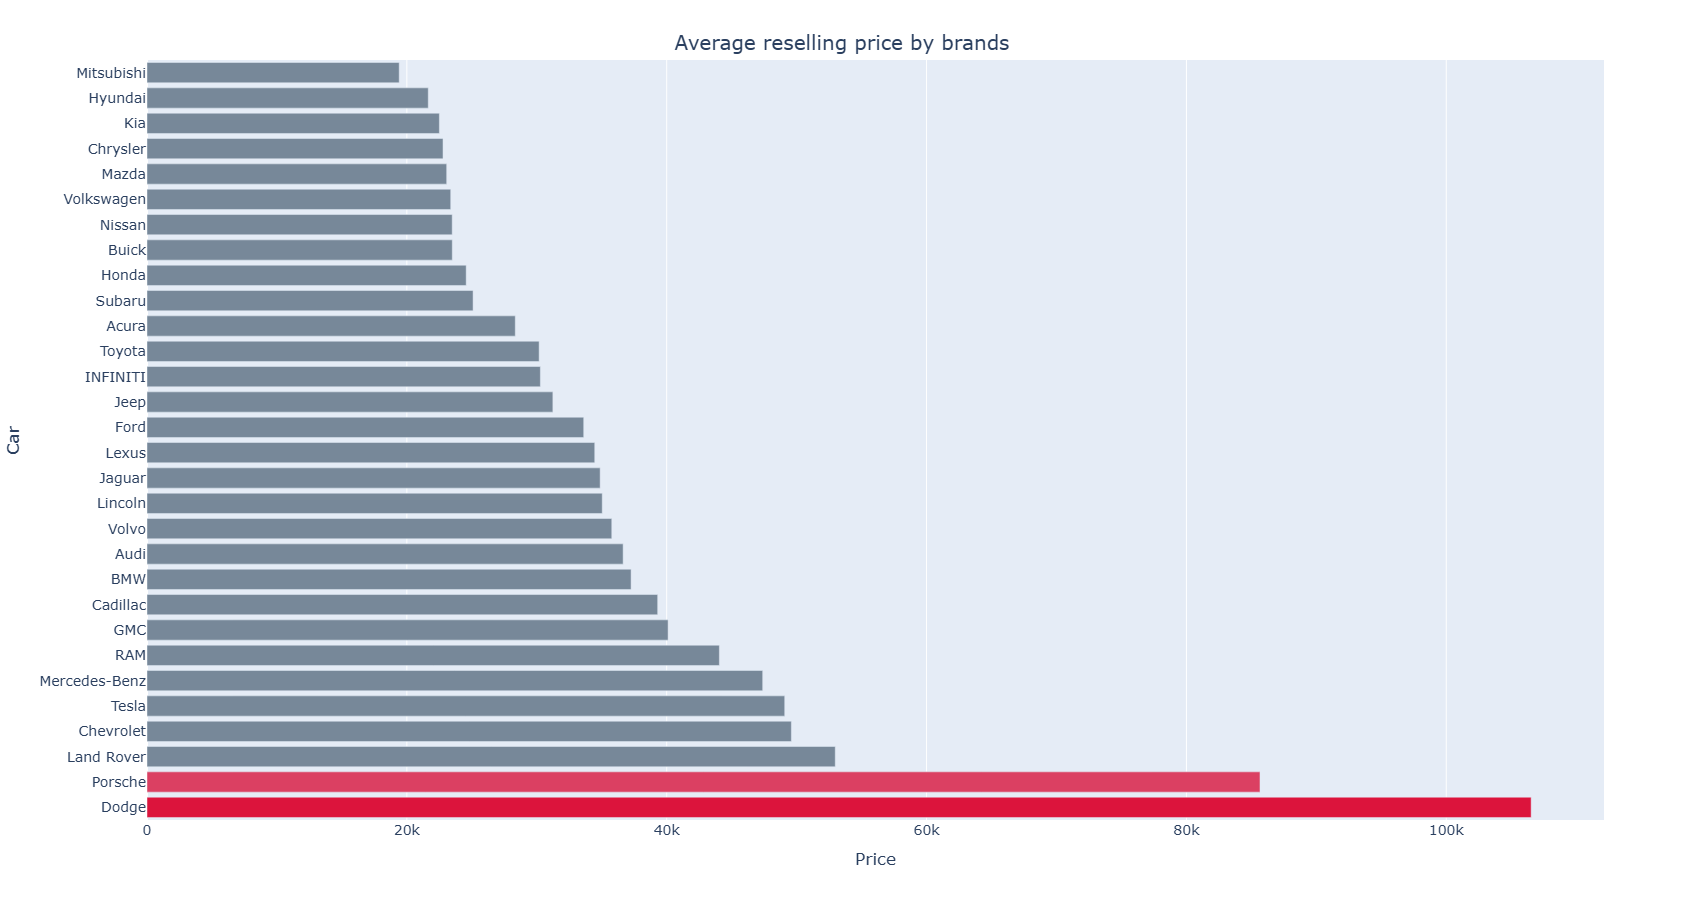

In [107]:
top_brand = data.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
color = ['lightslategray']*30
color[1] = '#db4062'
color[0] = 'crimson'

fig = px.bar(
    x=top_brand.values,       
    y=top_brand.index,
    orientation='h')
fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="Car",
    xaxis_title="Price",
    showlegend = False,
    height=900,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Average reselling price by brands",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

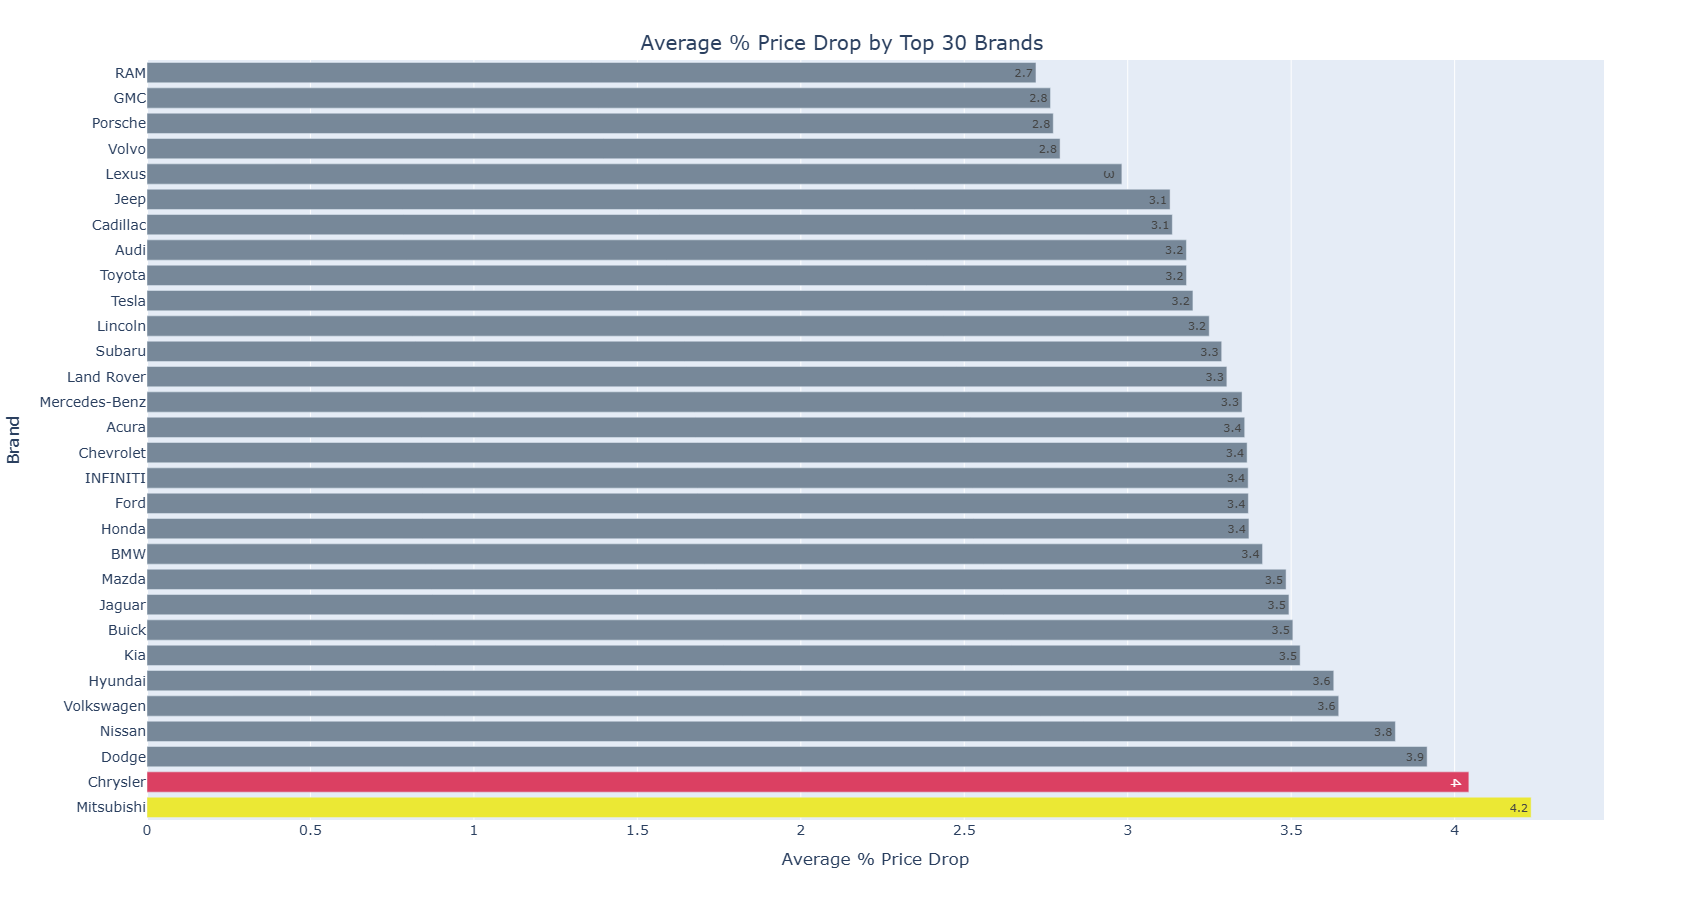

In [108]:
data['price_drop_pct'] = (data['price_drop'] / (data['price'] + data['price_drop'])) * 100

avg_price_drop_by_brand = data.groupby('manufacturer')['price_drop_pct'].mean().sort_values(ascending=False).head(30)

color[0] = '#ebe834'

fig = px.bar(
    x=avg_price_drop_by_brand.values,
    y=avg_price_drop_by_brand.index,
    orientation='h',
    text = avg_price_drop_by_brand.values.round(1)
)
fig.update_traces(marker_color=color)
fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % Price Drop",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % Price Drop by Top 30 Brands",
        'y': 0.96,
        'x': 0.5
    }
)
fig.show()

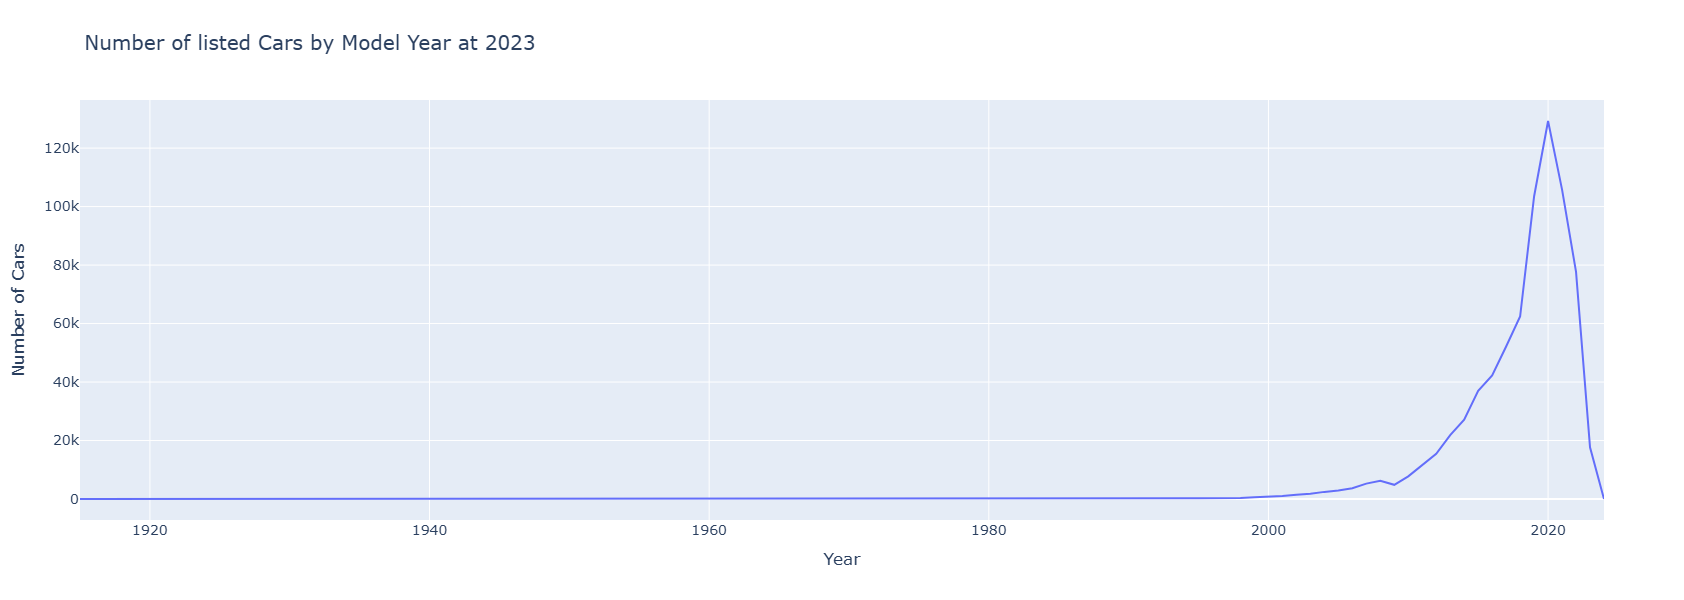

In [109]:
cars_per_year = data['year'].value_counts().sort_index()

import plotly.express as px

fig = px.line(
    x=cars_per_year.index,
    y=cars_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Cars'},
    title='Number of listed Cars by Model Year at 2023'
)

fig.update_layout(
    height=600,
    width=1200,
    font=dict(size=14)
)

fig.show()


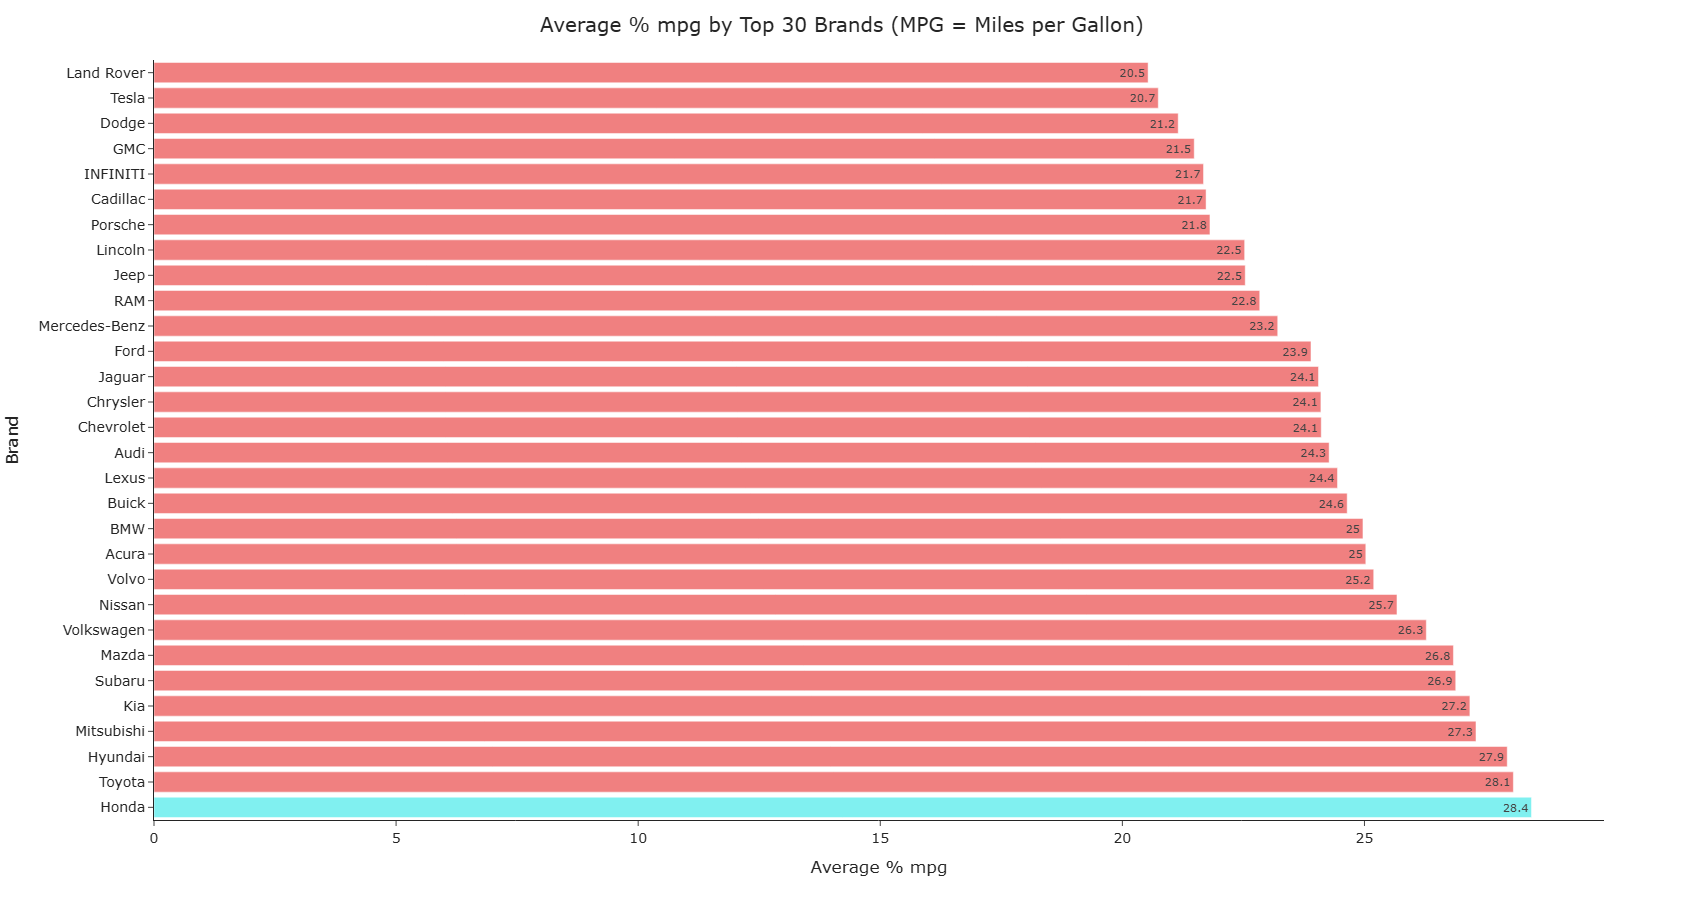

In [110]:

mpg_of_brand = new_data.groupby('manufacturer')['mpg'].mean().sort_values(ascending=False).head(30)

color = ['#f08080']*30
color[0] = '#80f0f0'

fig = px.bar(
    x=mpg_of_brand.values,
    y=mpg_of_brand.index,
    orientation='h',
    text = mpg_of_brand.values.round(1),
    template="simple_white"
)

fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % mpg",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % mpg by Top 30 Brands (MPG = Miles per Gallon)",
        'y': 0.98,
        'x': 0.5,
    },
)

fig.update_traces(marker_color=color)   

fig.show()

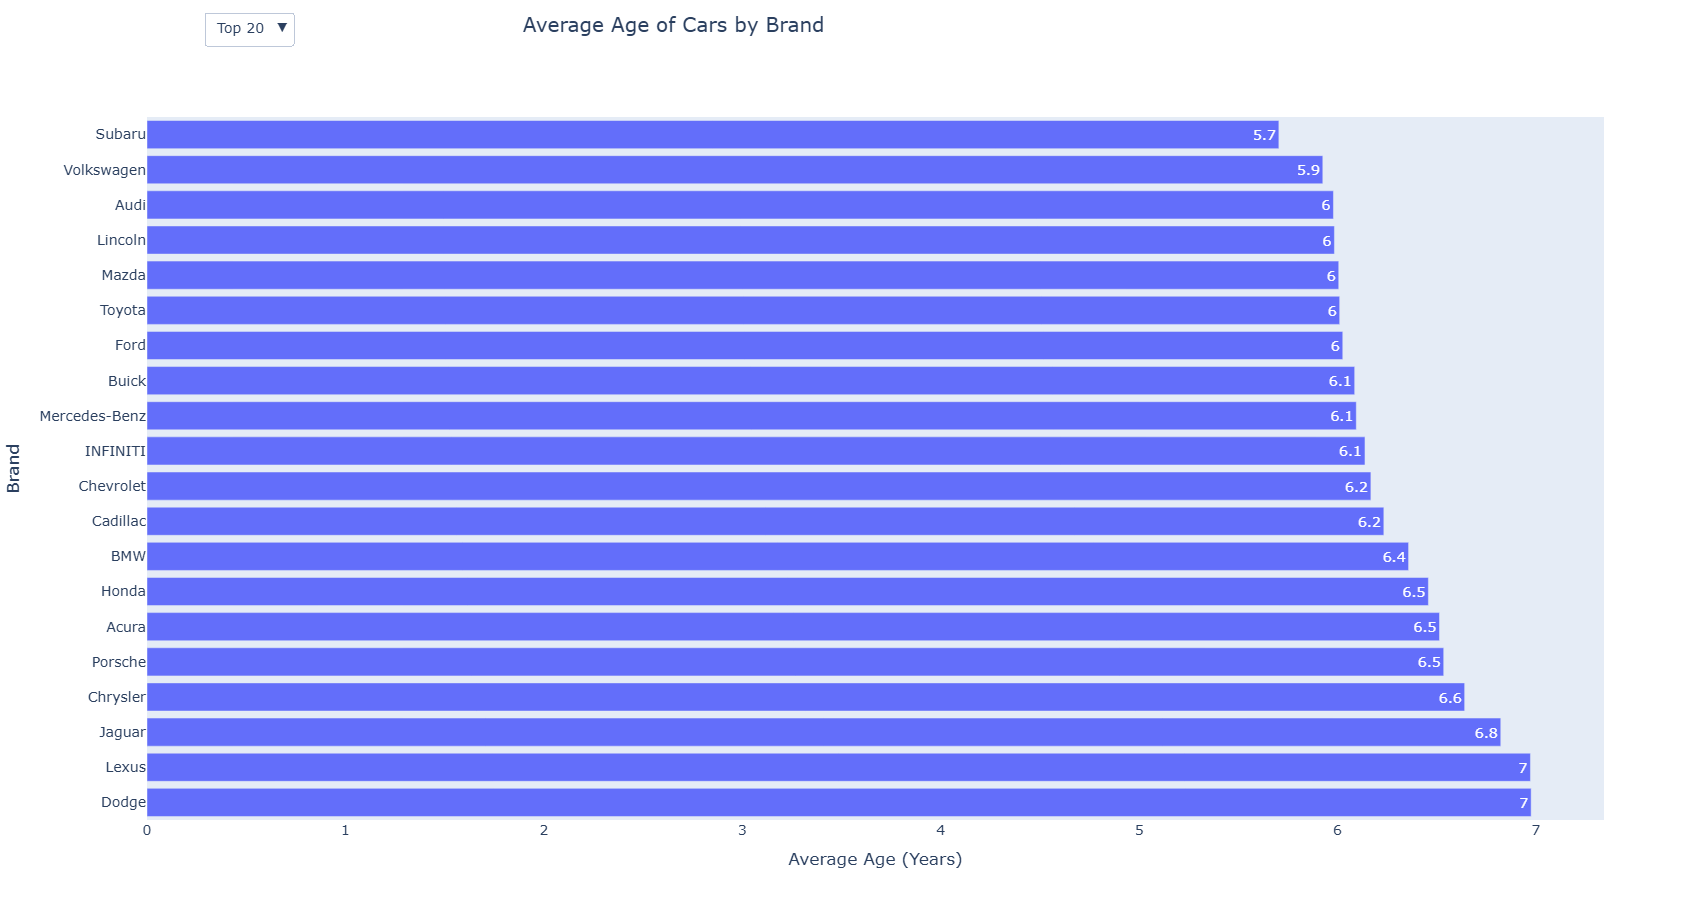

In [111]:
data['age'] = 2024 - data['year']

data_2000 = data[data['year'] > 2000]

avg_age_by_brand = data_2000.groupby('manufacturer')['age'].mean().sort_values(ascending=False)

top_options = [20, 15, 10, 30]
traces = []

for top_n in top_options:
    subset = avg_age_by_brand.head(top_n)
    trace = go.Bar(
        x=subset.values,
        y=subset.index,
        orientation='h',
        name=f'Top {top_n}',
        text=subset.values.round(1),
        # textposition='auto',
        visible=(top_n == 20)  
    )
    traces.append(trace)

buttons = [
    dict(label=f'Top {n}',
         method='update',
         args=[{'visible': [i == idx for i in range(len(top_options))]},
               {'title': f'Average Age of Cars (Top {n} Brands)'}])
    for idx, n in enumerate(top_options)
]

fig = go.Figure(data=traces)

fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        direction="down",
        buttons=buttons,
        y=1.15,
        x=0.1,
        showactive=True
    )],
    yaxis_title="Brand",
    xaxis_title="Average Age (Years)",
    showlegend=False,
    height=900,
    width=1200,
    font=dict(size=14),
    title={
        'text': "Average Age of Cars by Brand",
        'y': 0.98,
        'x': 0.4
    }
)
fig.show()

In [112]:
one_owner_ratio = data['one_owner'].value_counts(normalize=True)
one_owner_ratio

one_owner
 1.0    0.535544
 0.0    0.424500
-1.0    0.039956
Name: proportion, dtype: float64

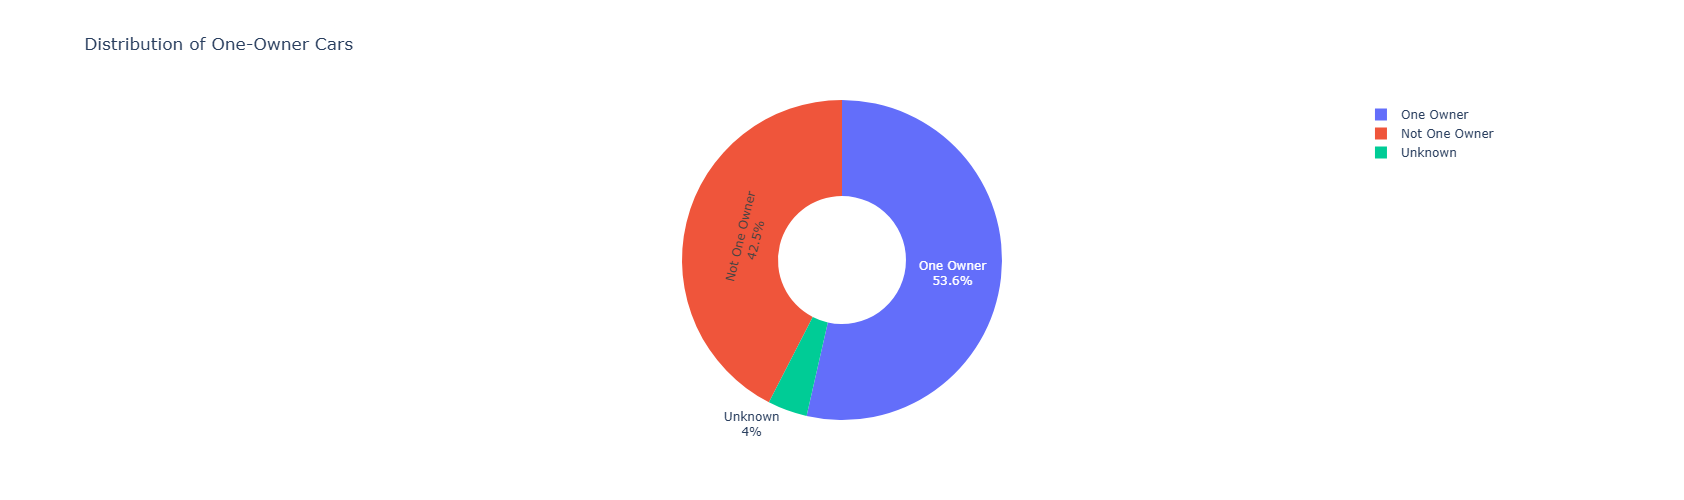

In [113]:
one_owner_ratio = data['one_owner'].value_counts(normalize=True)

label_map = {
    1.0: 'One Owner',
    0.0: 'Not One Owner',
   -1.0: 'Unknown'
}

import plotly.express as px

fig = px.pie(
    names = label_map,
    values=one_owner_ratio.values,
    title='Distribution of One-Owner Cars',
    hole=0.4
)
fig.update_layout(
    height=500,
    width=500,
)
fig.update_traces(textinfo='percent+label')
fig.show()


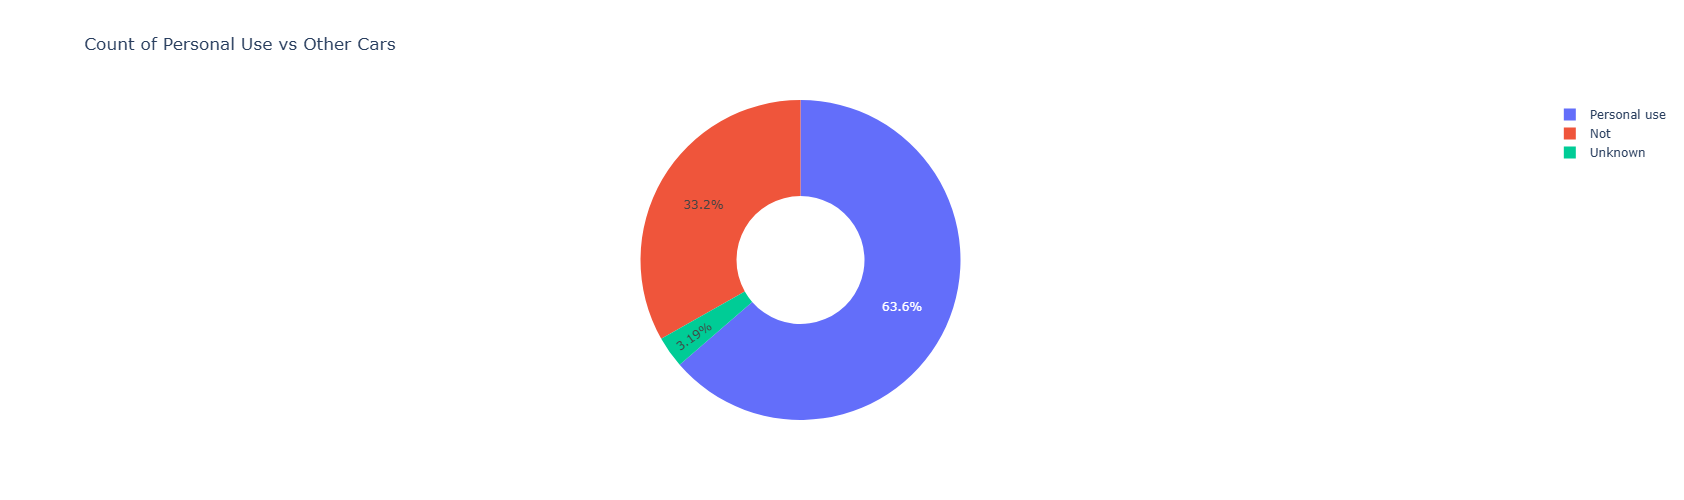

In [114]:
personal_use_ratio = data['personal_use_only'].value_counts(normalize=True)

label_names = ['Personal use','Not','Unknown']

fig = px.pie(
    names = label_names,
    values=personal_use_ratio.values,
    title='Count of Personal Use vs Other Cars',
    hole=0.4
)
fig.update_layout(
    height = 500,
    width = 500,
)
fig.show()

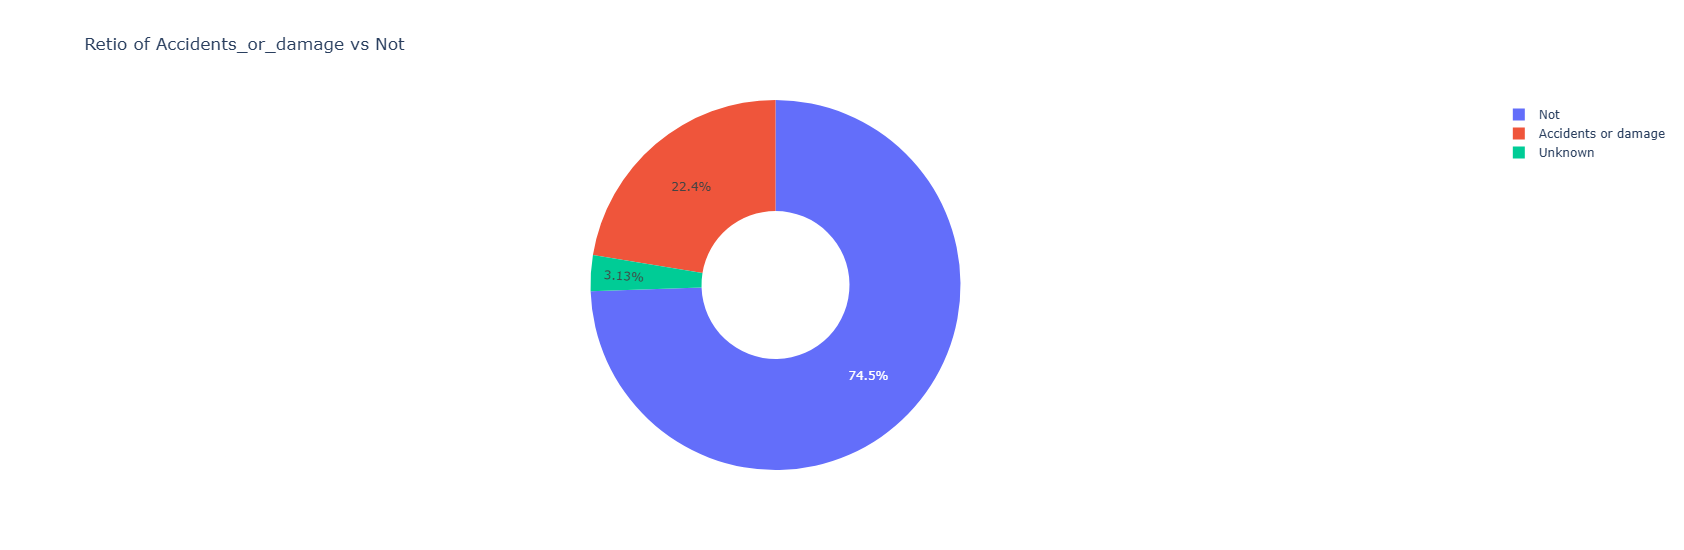

In [115]:
damage_ratio = data['accidents_or_damage'].value_counts(normalize = True)

label_names = ['Not','Accidents or damage','Unknown']

fig = px.pie(
    names = label_names,
    values=damage_ratio.values,
    title='Retio of Accidents_or_damage vs Not',
    hole=0.4
)
fig.update_layout(
    height = 550,
    width = 550,
)
fig.show()

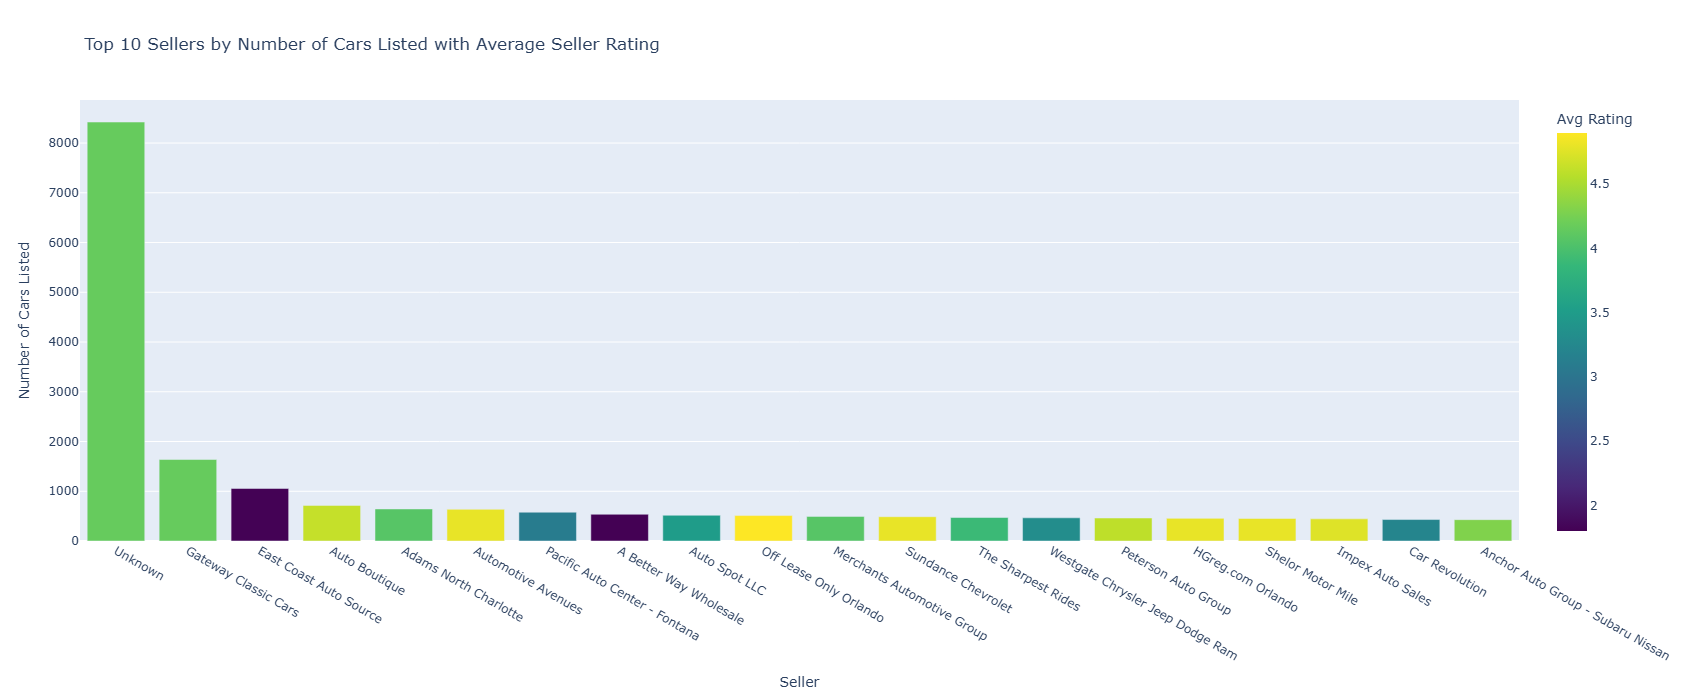

In [116]:
total_listings = data['seller_name'].value_counts()

average_ratings = (data[data['seller_rating'].notnull()].groupby('seller_name').agg({'seller_rating': 'mean'}))

combined = pd.DataFrame({'total_listings': total_listings}).join(average_ratings)

combined['seller_rating'] = combined['seller_rating'].round(2)

combined_sorted = combined.sort_values(by='total_listings', ascending=False)


top_seller = combined_sorted.head(20).reset_index()

fig = px.bar(
    top_seller,
    x='seller_name',
    y='total_listings',
    color='seller_rating',
    color_continuous_scale='Viridis',
    labels={'seller_name': 'Seller', 'total_listings': 'Number of Cars Listed', 'seller_rating': 'Average Rating'},
    title='Top 10 Sellers by Number of Cars Listed with Average Seller Rating',
)
fig.update_layout(
    height = 700,
    width = 1500,
    showlegend = False
)
fig.update_layout(coloraxis_colorbar=dict(title="Avg Rating"))

fig.show()


In [117]:
Dodge_data = data[data['manufacturer'] == 'Dodge']

In [118]:
Dodge_data['model']

165030              Aspen
165031         Caravan SE
165032        Caravan SXT
165033      Caravan Cargo
165034         Caravan SE
               ...       
190275    Durango GT Plus
190276        Durango R/T
190277    Durango Limited
190278        Durango SXT
190279         Durango GT
Name: model, Length: 25190, dtype: object

In [119]:
tesla_data = data[data['manufacturer'] == 'Tesla']
tesla_data.count()

manufacturer           5847
model                  5847
year                   5847
mileage                5847
engine                 5847
transmission           5847
drivetrain             5847
fuel_type              5847
mpg                    5847
exterior_color         5847
interior_color         5847
accidents_or_damage    5847
one_owner              5847
personal_use_only      5847
seller_name            5847
seller_rating          5847
driver_rating          5847
driver_reviews_num     5847
price_drop             3455
price                  5847
engine_size               5
cylinders                 1
valves                    0
aspiration                0
fuel_type_2            5696
injection_system          0
configuration             0
horsepower              348
fuel_category          5847
ENGINE_DETAILS         5847
age                    5847
age_group              5847
price_drop_pct         3455
dtype: int64

In [120]:
Gateway_Classic_Cars_data = data[data['seller_name']=='Gateway Classic Cars']
Gateway_Classic_Cars_data

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,aspiration,fuel_type_2,injection_system,configuration,horsepower,fuel_category,ENGINE_DETAILS,age,age_group,price_drop_pct
11288,Audi,Q7 3.0T Premium,2017,97123.0,v6 cylinder engine,Automatic,AWD,gasoline,22.000000,Graphite Gray Metallic,...,NaN,NaN,NaN,NaN,NaN,NaN,v6 gasoline,7,0-20,8.695652
17208,Audi,TT 2.0T,2014,60209.0,"2l i-4 gasoline direct injection, dohc, variab...",Automatic,AWD,gasoline,26.000000,Copper,...,NaN,gasoline,di,dohc,NaN,gasoline,gasoline di dohc,10,0-20,14.634146
22985,Audi,S6 5.2 Prestige,2011,33380.0,"5.2l v-10 gasoline direct injection, dohc, var...",Automatic,AWD,gasoline,16.000000,Silver,...,NaN,gasoline,di,dohc,NaN,gasoline,gasoline di dohc,13,0-20,2.777778
27022,BMW,650 650Ci,2006,69104.0,"4.8l v-8 dohc, double vanos variable valve con...",Automatic,RWD,gasoline,18.000000,Silver,...,NaN,NaN,NaN,dohc,NaN,NaN,gasoline dohc,18,0-20,NaN
28226,BMW,M6 Base,1988,89091.0,3.5l f dohc i6,Manual,Unknown,electric,20.741778,Black,...,NaN,NaN,NaN,dohc,NaN,NaN,i6 electric dohc,36,21-40,7.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741540,Volkswagen,Karmann Ghia,1971,81097.0,4 cyl 1600 cc,Manual,Unknown,electric,20.741778,Yellow,...,NaN,NaN,NaN,NaN,NaN,NaN,electric,53,41-80,NaN
741542,Volkswagen,Karmann Ghia,1971,29000.0,electric,Manual,Unknown,electric,20.741778,Gray,...,NaN,electric,NaN,NaN,NaN,electric,electric,53,41-80,1.587302
755336,Volvo,240 DL,1988,120321.0,i-4 b-23,Automatic,Unknown,electric,20.741778,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,electric,36,21-40,NaN
755337,Volvo,240,1992,138802.0,2.3l i-4 engine with 114hp,Automatic,Unknown,gasoline,24.000000,Red,...,NaN,NaN,NaN,NaN,114hp,NaN,gasoline,32,21-40,23.255814
